In [1]:
!pip install pandas numpy matplotlib seaborn scipy


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\nithi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Define file path
file_path = "C:\\Users\\nithi\\Downloads\\feedback_data.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [4]:
# Null Hypothesis (H0): The mean cohesion score is equal to 3.0
# Alternative Hypothesis (H1): The mean cohesion score is not equal to 3.0

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(data['cohesion'], 3.0)

# Display results
print(f"T-statistic: {t_statistic:.4f}, P-value: {p_value:.4f}")

# Interpretation:
# If p-value < 0.05, we reject the null hypothesis, indicating the mean cohesion score significantly differs from 3.0.

T-statistic: 11.9950, P-value: 0.0000


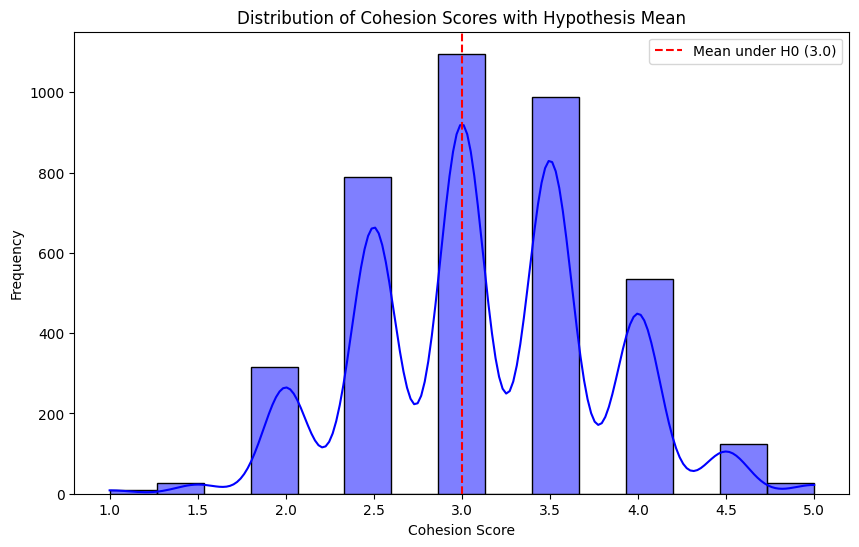

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data['cohesion'], kde=True, color='blue', bins=15)
plt.axvline(3.0, color='red', linestyle='--', label='Mean under H0 (3.0)')
plt.title('Distribution of Cohesion Scores with Hypothesis Mean')
plt.xlabel('Cohesion Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [6]:
# Calculate mean and standard error
mean_cohesion = np.mean(data['cohesion'])
std_error = stats.sem(data['cohesion'])

# Define confidence level
confidence_level = 0.95
degrees_freedom = len(data['cohesion']) - 1

# Compute confidence interval
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, mean_cohesion, std_error)

# Display confidence interval
print(f"95% Confidence Interval for Cohesion Scores: {confidence_interval}")

95% Confidence Interval for Cohesion Scores: (np.float64(3.106306720817079), np.float64(3.1478482267666594))


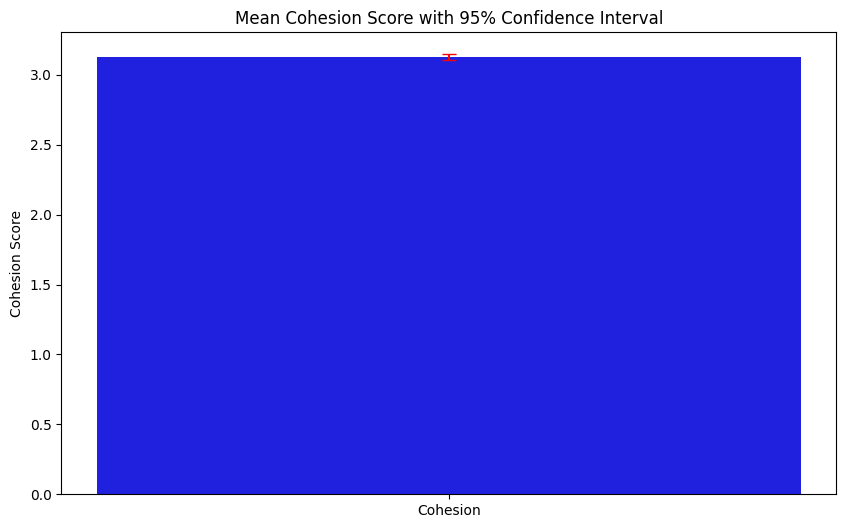

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=['Cohesion'], y=[mean_cohesion], color='blue')
plt.errorbar(x=['Cohesion'], y=[mean_cohesion], 
             yerr=[[mean_cohesion - confidence_interval[0]], [confidence_interval[1] - mean_cohesion]], 
             fmt='none', c='red', capsize=5)
plt.title('Mean Cohesion Score with 95% Confidence Interval')
plt.ylabel('Cohesion Score')
plt.show()